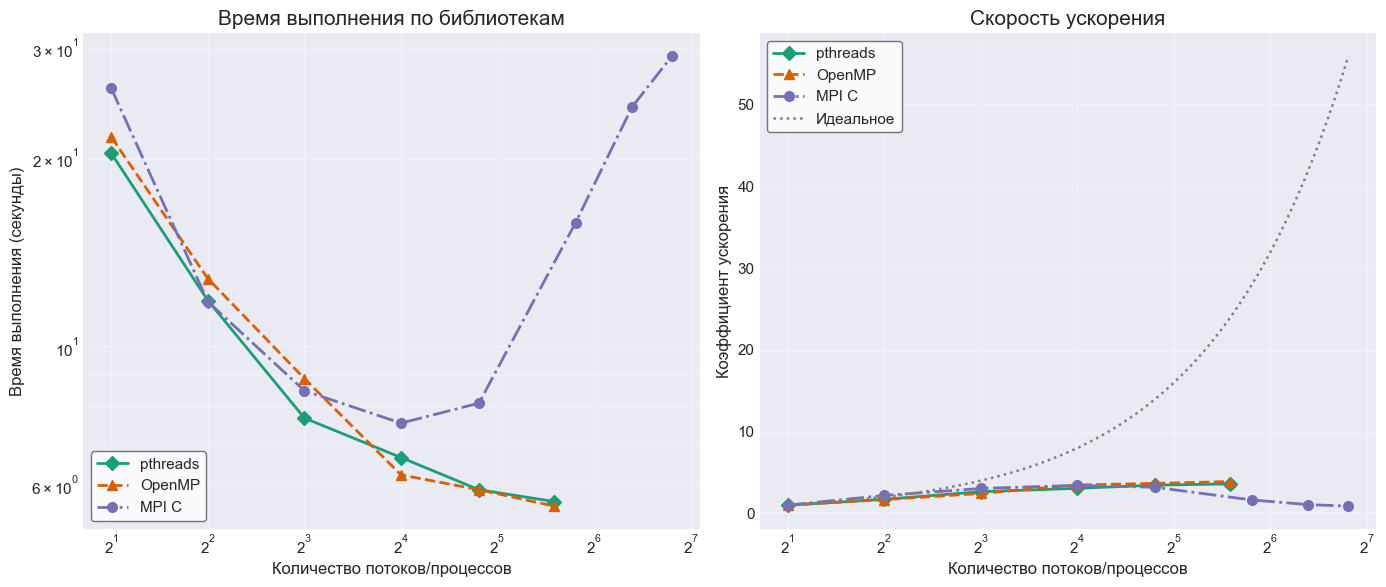

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

libraries = ['pthreads', 'OpenMP', 'MPI C']
threads_counts = {
    'pthreads': [2, 4, 8, 16, 28, 48],
    'OpenMP': [2, 4, 8, 16, 28, 48],
    'MPI C': [2, 4, 8, 16, 28, 56, 84, 112]
}
execution_times = {
    'pthreads': [20.360, 11.836, 7.675, 6.636, 5.894, 5.643],
    'OpenMP': [21.621, 12.833, 8.878, 6.225, 5.894, 5.548],
    'MPI C': [25.869, 11.784, 8.489, 7.533, 8.108, 15.761, 24.146, 29.165]
}

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.titlesize': 15,
    'axes.labelsize': 12
})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

colors = ['#1b9e77', '#d95f02', '#7570b3']
markers = ['D', '^', 'o']
linestyles = ['-', '--', '-.']

for i, lib in enumerate(libraries):
    axs[0].plot(
        threads_counts[lib], execution_times[lib],
        color=colors[i], marker=markers[i],
        linestyle=linestyles[i], linewidth=2,
        markersize=7, label=lib
    )

axs[0].set_xscale('log', base=2)
axs[0].set_yscale('log')
axs[0].set_xlabel('Количество потоков/процессов')
axs[0].set_ylabel('Время выполнения (секунды)')
axs[0].set_title('Время выполнения по библиотекам')
axs[0].legend(frameon=True, facecolor='white', edgecolor='#555')
axs[0].grid(True, which='both', linestyle=':', linewidth=0.7)

for i, lib in enumerate(libraries):
    base_time = execution_times[lib][0]
    speedup = [base_time / t for t in execution_times[lib]]
    axs[1].plot(
        threads_counts[lib], speedup,
        color=colors[i], marker=markers[i],
        linestyle=linestyles[i], linewidth=2,
        markersize=7, label=lib
    )

max_threads = max([max(v) for v in threads_counts.values()])
ideal_x = np.linspace(2, max_threads, 100)
ideal_y = ideal_x / 2
axs[1].plot(ideal_x, ideal_y, color='gray', linestyle=':', linewidth=1.8, label='Идеальное')

axs[1].set_xscale('log', base=2)
axs[1].set_xlabel('Количество потоков/процессов')
axs[1].set_ylabel('Коэффициент ускорения')
axs[1].set_title('Скорость ускорения')
axs[1].legend(frameon=True, facecolor='white', edgecolor='#555')
axs[1].grid(True, which='both', linestyle=':', linewidth=0.7)

plt.tight_layout()
plt.show()


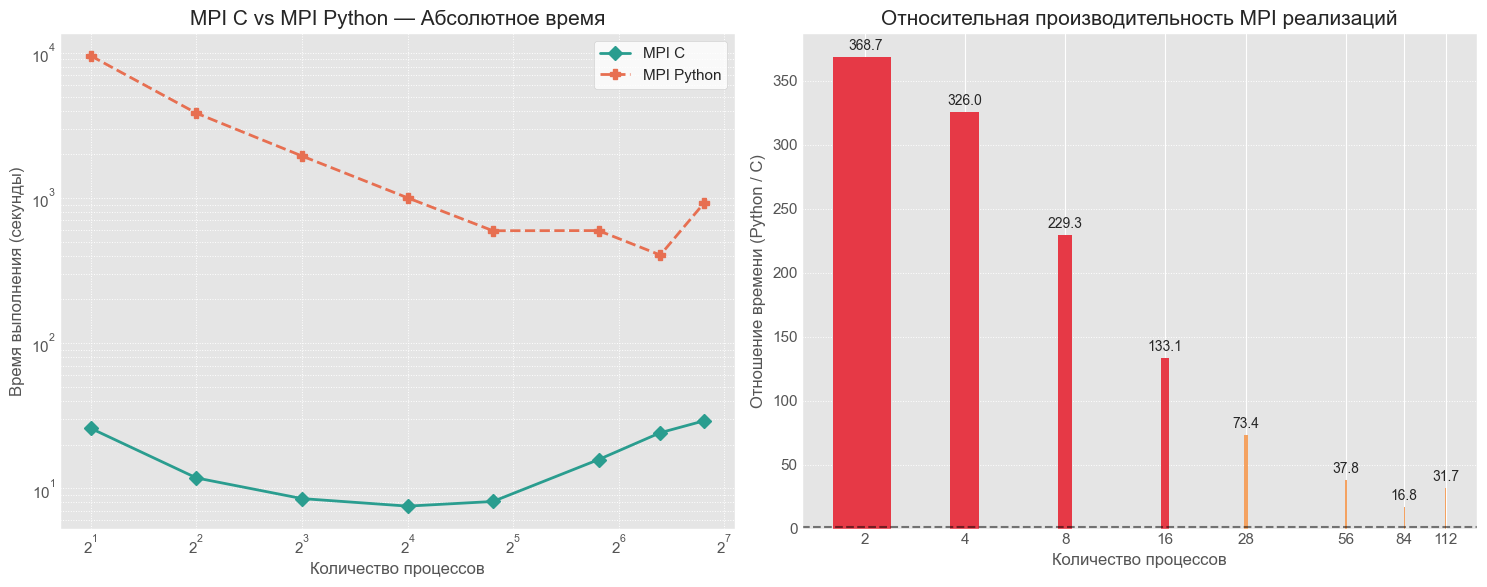

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mpi_c_threads = [2, 4, 8, 16, 28, 56, 84, 112]
mpi_c_times = [25.869, 11.784, 8.489, 7.533, 8.108, 15.761, 24.146, 29.165]

mpi_python_threads = [2, 4, 8, 16, 28, 56, 84, 112]
mpi_python_times = [
    158 * 60 + 56.787,
    64 * 60 + 1.496,
    32 * 60 + 26.409,
    16 * 60 + 42.749,
    9 * 60 + 54.924,
    9 * 60 + 56.280,
    6 * 60 + 44.509,
    15 * 60 + 24.428
]

plt.style.use('ggplot')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.titlesize': 15,
    'axes.labelsize': 12,
    'legend.frameon': True,
    'legend.facecolor': 'white'
})

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(
    mpi_c_threads, mpi_c_times,
    color='#2a9d8f', marker='D', linestyle='-', linewidth=2, markersize=7,
    label='MPI C'
)
axs[0].plot(
    mpi_python_threads, mpi_python_times,
    color='#e76f51', marker='P', linestyle='--', linewidth=2, markersize=7,
    label='MPI Python'
)

axs[0].set_xscale('log', base=2)
axs[0].set_yscale('log')
axs[0].set_xlabel('Количество процессов')
axs[0].set_ylabel('Время выполнения (секунды)')
axs[0].set_title('MPI C vs MPI Python — Абсолютное время')
axs[0].legend()
axs[0].grid(True, which='both', linestyle=':', linewidth=0.7)

performance_ratio = [
    mpi_python_times[i] / mpi_c_times[i]
    for i in range(min(len(mpi_c_threads), len(mpi_python_threads)))
]
threads_common = mpi_c_threads[:len(performance_ratio)]

colors = ['#e63946' if r > 100 else '#f4a261' for r in performance_ratio]
bars = axs[1].bar(threads_common, performance_ratio, color=colors)

for bar, ratio in zip(bars, performance_ratio):
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 3,
                f'{ratio:.1f}', ha='center', va='bottom', fontsize=10)

axs[1].set_xscale('log', base=2)
axs[1].set_xticks(threads_common)
axs[1].get_xaxis().set_major_formatter(plt.ScalarFormatter())
axs[1].set_xlabel('Количество процессов')
axs[1].set_ylabel('Отношение времени (Python / C)')
axs[1].set_title('Относительная производительность MPI реализаций')
axs[1].axhline(y=1, color='black', linestyle='--', alpha=0.5)
axs[1].grid(axis='y', linestyle=':', linewidth=0.7)

plt.tight_layout()
plt.show()
